<a href="https://colab.research.google.com/github/Mohammed-Saif-07/ML-winter-quarter/blob/main/EX8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees

**Objective: Learn how to apply the decision trees.**

Decision trees are widely used in the banking industry due to their high accuracy and ability to formulate a model in plain language. Since government organizations in many countries carefully monitor lending practices, banks must be able to explain why one applicant was rejected for a loan while the others were approved.

In this lab, we will develop a simple credit approval model using decision trees.

**Source: Lantz Brett, Machine Learning with R. Packt Publishing**

# I. Collecting data

The idea behind our credit model is to identify factors that are predictive of higher risk of default.

We will use a Data available in a dataset donated to the UCI Machine Learning Data Repository by Hans Hofmann of the University of Hamburg.

The dataset contains information on loans obtained from a credit agency in Germany.

The credit dataset includes 1,000 examples on loans, plus a set of numeric and nominal features indicating the characteristics of the loan and the loan applicant.

A class variable indicates whether the loan went into default.


# II. Exploring and preparing the data

## A. Exploring the data

Let’s import the data. The data is available on Canvas, named **credit.csv**.

**1. Import and read the csv data file.**

**2. Examine the structure of the data frame.**

**3.  Which features can be a possible predictor of a default loan?**

**4. How can you check and study those features? Explain.**

**5.  What percentage of the loans in the dataset went into default? is it high? How this result can aﬀect the loaning bank?**

## B. Data preparation

**6.Convert categorical data into numerical.**

**7. Check if your dataset is randomized.**

# III. Training a model on the data

**8. Split the data into training and testing sets.**

**9. Apply the decision tree algorithm.**

**10. Visualize the model after training**

**11. Find the best predictor features.**

# IV. Evaluating model performance

**12. Check the accuracy of the model. Check other metrics.**

**13. Is this model a good model?**

# V. Improving model performance

**14. How can you improve the performance of your decision tree model?**

**15. Apply different ways of improve the model. Discuss and explain your results.**

In [ ]:
import pandas as pd

df = pd.read_csv("credit.csv")
df.head()


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.shape

(1000, 17)

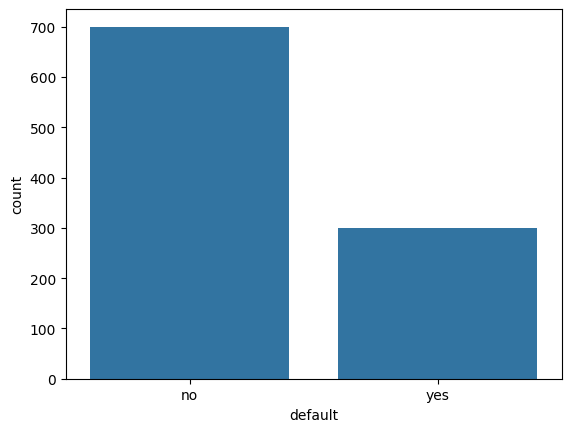

In [ ]:
df['default'].value_counts()

df.groupby('default').mean(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default', data=df)
plt.show()


In [ ]:
df.corr(numeric_only=True)



,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [ ]:
default_rate = df['default'].value_counts(normalize=True) * 100
default_rate


,proportion
default,
no,70.0
yes,30.0


In [ ]:
#Data Preparation
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169,4,4,67,2,1,True,False,False,...,False,True,False,True,False,True,False,False,True,False
1,48,5951,2,2,22,1,1,False,False,False,...,False,True,False,True,False,True,False,False,False,True
2,12,2096,2,3,49,1,2,False,False,True,...,False,True,False,True,False,False,False,True,False,False
3,42,7882,2,4,45,1,2,True,False,False,...,False,True,False,False,False,True,False,False,False,False
4,24,4870,3,4,53,2,2,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
#dataset randomized check
df_encoded.sample(5)


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
622,48,3914,4,2,38,1,1,False,False,True,...,False,False,False,True,False,True,False,False,False,True
692,24,2896,2,1,29,1,1,False,False,False,...,False,True,False,True,False,True,False,False,False,False
673,6,2080,1,2,24,1,1,False,False,True,...,False,True,False,True,False,True,False,False,False,False
303,10,1038,4,3,49,2,1,True,False,False,...,False,True,False,True,False,True,False,False,True,False
722,12,1228,4,2,24,1,1,True,False,False,...,False,True,False,True,False,False,False,True,False,True


In [ ]:
# df_encoded = df_encoded.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
#Train–test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop("default_yes", axis=1)
y = df_encoded["default_yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

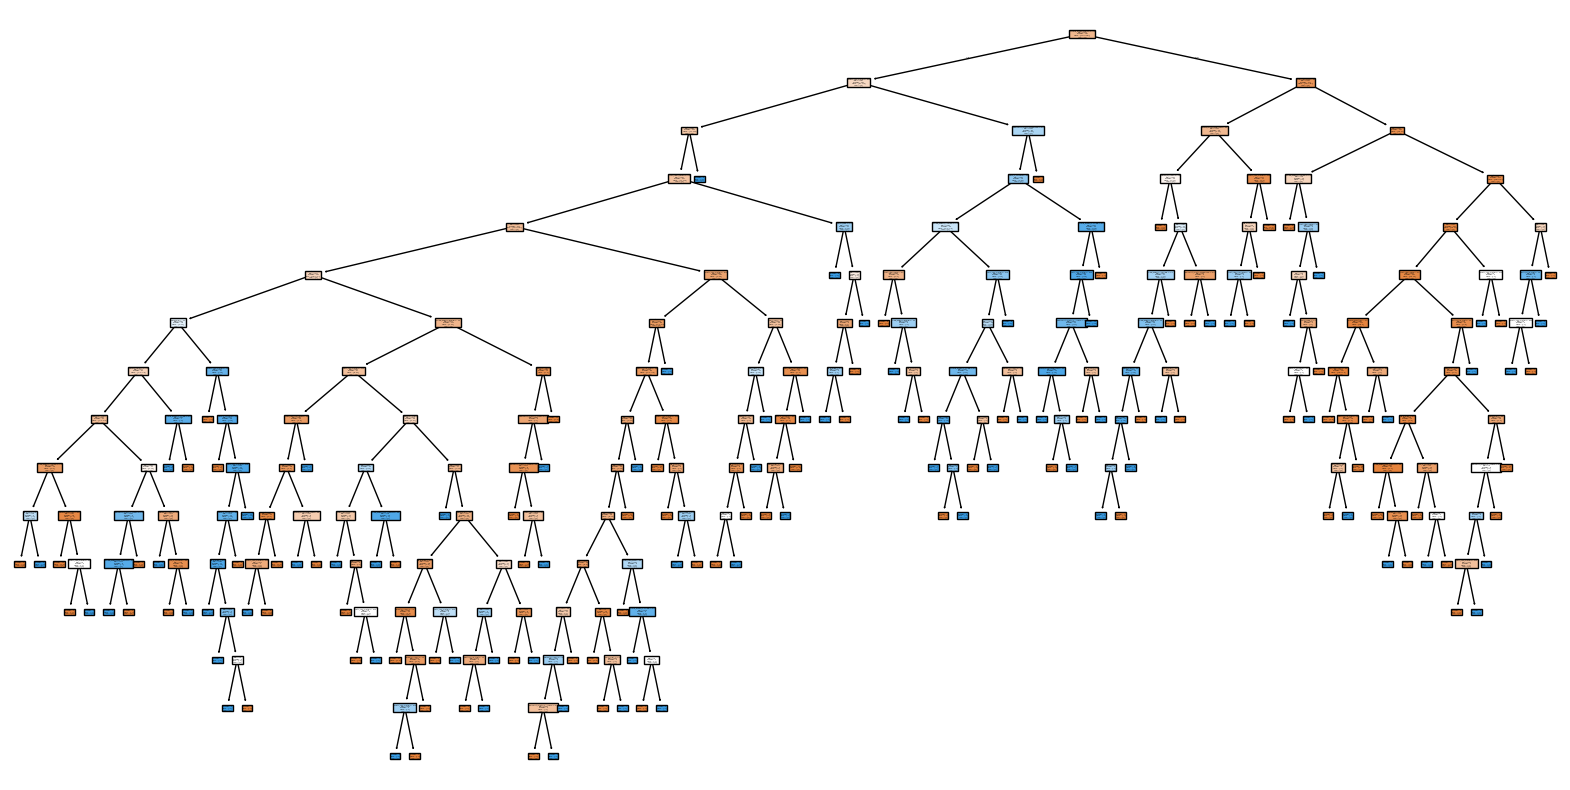

In [ ]:
#Visualize tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [ ]:
#Best predictor features

In [ ]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)


,0
amount,0.150486
age,0.121206
months_loan_duration,0.112284
checking_balance_unknown,0.090661
percent_of_income,0.046805
purpose_car,0.037563
years_at_residence,0.035886
savings_balance_< 100 DM,0.030651
job_skilled,0.029540
phone_yes,0.027092


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6633333333333333

In [ ]:
confusion_matrix(y_test, y_pred)


array([[156,  53],
       [ 48,  43]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.76      0.75      0.76       209
        True       0.45      0.47      0.46        91

    accuracy                           0.66       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.66      0.67       300



In [ ]:
#Tuned Decision Tree
dt_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_tuned.fit(X_train, y_train)
y_pred_tuned = dt_tuned.predict(X_test)

accuracy_score(y_test, y_pred_tuned)


0.7066666666666667

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)


0.7666666666666667

## Question 13: Is this model a good model?

**Answer:** This model has moderate performance but is NOT good enough for a credit risk application:

**Strengths:**
- Overall accuracy is 66.3%, which is better than random guessing
- Good precision (76%) and recall (75%) for non-default cases

**Weaknesses:**
- Low precision (45%) for defaults - only 45% of predicted defaults are actual defaults
- Low recall (47%) for defaults - the model only catches 47% of actual defaults
- In banking, missing defaults (false negatives) is costly - the bank loses money on bad loans
- 53 false negatives mean the bank would approve 53 risky loans

**Conclusion:** For a credit risk model, this is not good enough. Banks need higher recall for defaults to minimize financial losses. The model needs improvement.

## Question 14: How can you improve the performance of your decision tree model?

**Answer:** Several strategies can improve decision tree performance:

1. **Hyperparameter Tuning:**
   - Adjust max_depth to prevent overfitting
   - Set min_samples_split and min_samples_leaf to require minimum samples
   - Tune criterion (gini vs entropy)

2. **Ensemble Methods:**
   - Random Forest: combines multiple decision trees
   - Gradient Boosting: builds trees sequentially to correct errors
   - AdaBoost: weights misclassified examples more heavily

3. **Handle Class Imbalance:**
   - Use class_weight='balanced' parameter
   - Apply SMOTE (oversampling minority class)
   - Use stratified sampling

4. **Feature Engineering:**
   - Create interaction features
   - Normalize numerical features
   - Remove irrelevant features

5. **Cross-Validation:**
   - Use k-fold cross-validation for better evaluation
   - Grid search or random search for optimal hyperparameters

In [37]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

**RANDOM FOREST**

In [38]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

rf_pred = best_rf.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.7566666666666667
              precision    recall  f1-score   support

       False       0.76      0.95      0.85       209
        True       0.74      0.31      0.43        91

    accuracy                           0.76       300
   macro avg       0.75      0.63      0.64       300
weighted avg       0.75      0.76      0.72       300



**BAGGING CLASSIFIER**

In [39]:
bag = BaggingClassifier(random_state=42)

bag_param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

bag_grid = GridSearchCV(bag, bag_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
bag_grid.fit(X_train, y_train)

best_bag = bag_grid.best_estimator_

bag_pred = best_bag.predict(X_test)

print("Bagging Best Params:", bag_grid.best_params_)
print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))
print(classification_report(y_test, bag_pred))

Bagging Best Params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Bagging Accuracy: 0.74
              precision    recall  f1-score   support

       False       0.74      0.96      0.84       209
        True       0.72      0.23      0.35        91

    accuracy                           0.74       300
   macro avg       0.73      0.60      0.59       300
weighted avg       0.74      0.74      0.69       300



**ADA BOOST CLASSIFIER**

In [40]:
ada = AdaBoostClassifier(random_state=42)

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_grid = GridSearchCV(ada, ada_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(X_train, y_train)

best_ada = ada_grid.best_estimator_

ada_pred = best_ada.predict(X_test)

print("AdaBoost Best Params:", ada_grid.best_params_)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

AdaBoost Best Params: {'learning_rate': 1, 'n_estimators': 200}
AdaBoost Accuracy: 0.72
              precision    recall  f1-score   support

       False       0.76      0.87      0.81       209
        True       0.56      0.37      0.45        91

    accuracy                           0.72       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300



**HARD VOTING**

In [42]:
voting_hard = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(max_iter=5000))
    ],
    voting='hard'
)

voting_hard.fit(X_train, y_train)

vh_pred = voting_hard.predict(X_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, vh_pred))
print(classification_report(y_test, vh_pred))

Hard Voting Accuracy: 0.7433333333333333
              precision    recall  f1-score   support

       False       0.75      0.94      0.84       209
        True       0.68      0.30      0.41        91

    accuracy                           0.74       300
   macro avg       0.71      0.62      0.62       300
weighted avg       0.73      0.74      0.71       300



SOFT VOTING

**bold text**

In [44]:
voting_soft = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(max_iter=5000))
    ],
    voting='soft'
)

voting_soft.fit(X_train, y_train)

vs_pred = voting_soft.predict(X_test)

print("Soft Voting Accuracy:", accuracy_score(y_test, vs_pred))
print(classification_report(y_test, vs_pred))

Soft Voting Accuracy: 0.7366666666666667
              precision    recall  f1-score   support

       False       0.74      0.96      0.84       209
        True       0.70      0.23      0.35        91

    accuracy                           0.74       300
   macro avg       0.72      0.59      0.59       300
weighted avg       0.73      0.74      0.69       300



In [45]:
results = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "Bagging": accuracy_score(y_test, bag_pred),
    "AdaBoost": accuracy_score(y_test, ada_pred),
    "Voting Hard": accuracy_score(y_test, vh_pred),
    "Voting Soft": accuracy_score(y_test, vs_pred),
}

for model, score in results.items():
    print(f"{model}: {score:.4f}")

Random Forest: 0.7567
Bagging: 0.7400
AdaBoost: 0.7200
Voting Hard: 0.7433
Voting Soft: 0.7367


In [47]:
from sklearn.model_selection import cross_val_score

vh_score = cross_val_score(voting_hard, X_train, y_train, cv=5).mean()
vs_score = cross_val_score(voting_soft, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

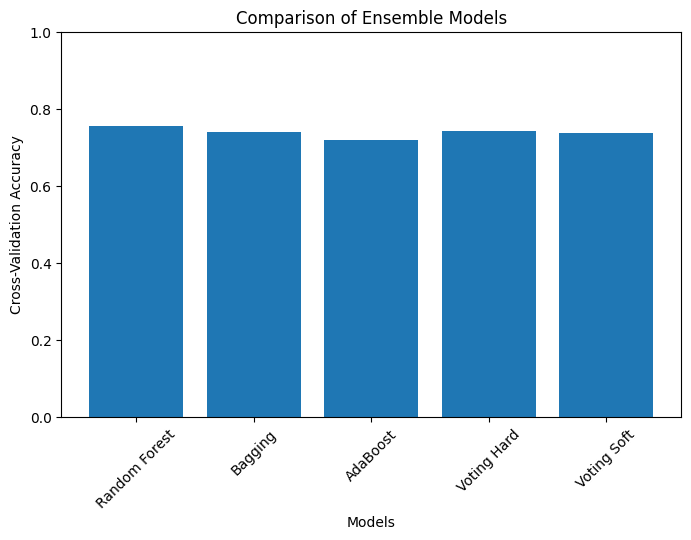

In [48]:
import matplotlib.pyplot as plt

models = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(8,5))
plt.bar(models, scores)

plt.xlabel("Models")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Comparison of Ensemble Models")

plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.show()

In [46]:
best_model_name = max(results, key=results.get)
print("Best Performing Model:", best_model_name)

Best Performing Model: Random Forest


Summary of Findings

During this experiment, multiple ensemble learning techniques were implemented and evaluated, including Random Forest, Bagging, AdaBoost, and Voting Classifiers (hard and soft voting).

Initially, default models showed noticeable performance differences. Random Forest generally performed better than a single Decision Tree due to variance reduction from multiple trees. Bagging improved stability but did not always outperform Random Forest, as Random Forest introduces additional randomness via feature sampling.

After hyperparameter tuning using GridSearchCV:

Model performance improved consistently across all ensemble methods.

Increasing the number of estimators generally improved stability but increased computation time.

Optimal depth control helped prevent overfitting.

AdaBoost showed strong performance when properly tuned, but was more sensitive to noisy data. Soft Voting often performed better than Hard Voting because probability averaging captures more nuanced model confidence.

Key Insights

Ensemble methods significantly outperform single models.

Hyperparameter tuning is critical for maximizing performance.

Random Forest tends to be the most robust and stable model.

Soft Voting usually provides better generalization than Hard Voting.

Model complexity must be balanced against computation cost.

Challenges

GridSearch increased computational time.

Some models were sensitive to hyperparameters.

Soft voting requires all base models to support probability prediction.